- ID - Client Loan application ID
- Client_Income - Доход клиента в $
- Car_Owned - Любой автомобиль, принадлежащий клиенту до подачи заявки на - кредит на другой автомобиль
- Bike_Owned - Любой мотоцикл, принадлежащий клиенту
- Active_Loan - Любой другой активный кредит на момент подачи заявки на кредит
- House_Own - Любой дом, принадлежащий клиенту
- Child_Count - Любой дом, принадлежащий клиенту
- Credit_Amount - Сумма кредита в $
- Loan_Annuity - Кредитный аннуитет в $
- Accompany_Client - Кто сопровождал клиента, когда клиент подавал заявку на кредит
- Client_Income_Type - Тип дохода клиентов
- Client_Education - Высочайший уровень образования, гарантированный клиентом
- Client_Marital_Status - Семейное положение клиента (D - разведен, S - не женат, M - женат, W - вдовец)
- Client_Gender - Пол клиента
- Loan_Contract_Type - Тип кредита (CL - кредит наличными, RL - возобновляемый кредит)
- Client_Housing_Type - Ситуация с жильем для клиентов
- Population_Region_Relative - Относительная численность населения региона, в котором проживает клиент
- Age_Days - Возраст клиента на момент подачи заявки
- Employed_Days - За несколько дней до подачи заявки клиент начал зарабатывать
- Registration_Days - За несколько дней до подачи заявки на кредит клиент сменил регистрацию
- ID_Days - За несколько дней до подачи заявки на кредит клиент сменил документ, удостоверяющий личность, с помощью которого была подана заявка на получение кредита
- Homephone_Tag - Номер домашнего телефона
- Workphone_Working - Был ли номер рабочего телефона доступен
- Client_Family_Members - Тип профессии клиента
- Cleint_City_Rating - Рейтинг города клиента. 3 обозначает лучшее, 2 — хорошее, а 1 — среднее
- Application_Process_Day - День недели, в который клиент подал заявку на кредит
- Application_Process_Hour - Час дня, в который клиент обратился за кредитом
- Client_Permanent_Match_Tag - Указание, если контактный адрес клиента не совпадает с постоянным адресом
- Client_Contact_Work_Tag - Указание на то, что рабочий адрес клиента не совпадает с контактным адресом.
- Type_Organization - Тип организации, в которой работает клиент
- Phone_Change - Сколько друзей/членов семьи клиента не выполнили платеж по кредиту за последние 60 дней
- Default - 1 означает, что клиент не выполнил платежи по кредиту, а 0 означает иное

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
dataset = pd.read_csv('data/bank_credit.csv', header=0)
dataset.head()

C:\Users\nagor\AppData\Local\Temp\ipykernel_20448\287087661.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('data/bank_credit.csv', header=0)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [4]:
# удаляем ненужные строки
dataset.drop(['ID','Score_Source_1','Score_Source_2', 'Score_Source_3', 'Mobile_Tag', 'Own_House_Age', 'Client_Occupation', 'Social_Circle_Default', 'Credit_Bureau'], axis=1, inplace=True)
dataset.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Phone_Change,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,...,0,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,63.0,0
1,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,Service,...,1,2.0,2.0,3.0,10.0,Yes,Yes,Government,NaN,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,...,0,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,277.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,...,0,2.0,3.0,2.0,15.0,Yes,Yes,XNA,1700.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,...,0,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,674.0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121801 entries, 0 to 121800
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118195 non-null  float64
 1   Car_Owned                   118221 non-null  float64
 2   Bike_Owned                  118177 non-null  float64
 3   Active_Loan                 118166 non-null  float64
 4   House_Own                   118142 non-null  float64
 5   Child_Count                 118166 non-null  float64
 6   Credit_Amount               118170 non-null  float64
 7   Loan_Annuity                116991 non-null  float64
 8   Accompany_Client            120055 non-null  object 
 9   Client_Income_Type          118101 non-null  object 
 10  Client_Education            118159 non-null  object 
 11  Client_Marital_Status       118332 non-null  object 
 12  Client_Gender               119389 non-null  object 
 13  Loan_Contract_

In [6]:
# ищем пропуски
dataset.isna().sum()

Client_Income                 3606
Car_Owned                     3580
Bike_Owned                    3624
Active_Loan                   3635
House_Own                     3659
Child_Count                   3635
Credit_Amount                 3631
Loan_Annuity                  4810
Accompany_Client              1746
Client_Income_Type            3700
Client_Education              3642
Client_Marital_Status         3469
Client_Gender                 2412
Loan_Contract_Type            3648
Client_Housing_Type           3686
Population_Region_Relative    4859
Age_Days                      3615
Employed_Days                 3666
Registration_Days             3631
ID_Days                       5981
Homephone_Tag                    0
Workphone_Working                0
Client_Family_Members         2409
Cleint_City_Rating            2405
Application_Process_Day       2427
Application_Process_Hour      3660
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Type_Organization   

In [7]:
# удаляем строки с пропусками
dataset.dropna(subset=['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Type_Organization', 'Phone_Change'], axis=0, inplace=True)
dataset.isna().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Phone_Change                  0
Default                       0
dtype: i

In [8]:
# # сокращаем число строк
# dataset = dataset[:10000]
# dataset.shape

In [9]:
# разделение на объекты-признаки и целевой признак
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [10]:
# кодируем категориальные данные из строк в числа
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
dataset['Client_Marital_Status'].unique()

array(['M', 'W', 'S', 'D'], dtype=object)

In [12]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8,9, 10, 11, 12, 13, 14, 26, 27, 28])], remainder='passthrough')
X = np.array(ct.fit_transform(X).toarray())
#X = ct.fit_transform(X)
X

array([[  1.,   0.,   0., ...,   6.,  17.,  63.],
       [  1.,   0.,   0., ...,   2.,  10., 739.],
       [  1.,   0.,   0., ...,   3.,  14.,   0.],
       ...,
       [  1.,   0.,   0., ...,   5.,  11.,   0.],
       [  1.,   0.,   0., ...,   1.,  12.,   0.],
       [  1.,   0.,   0., ...,   4.,   6., 805.]])

In [13]:
# 1.Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
# 2.Первичное обучение модели и оценка качества
cl1_1 = KNeighborsClassifier(n_neighbors=100)
cl1_1.fit(X_train, y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.9190993788819876, 0.9210292812777284)

In [15]:
# 3.Оценка качества модели с использованием кросс-валидации
scores = cross_val_score(KNeighborsClassifier(n_neighbors=100), X, y, cv=100)
np.mean(scores)

0.9194858785886146

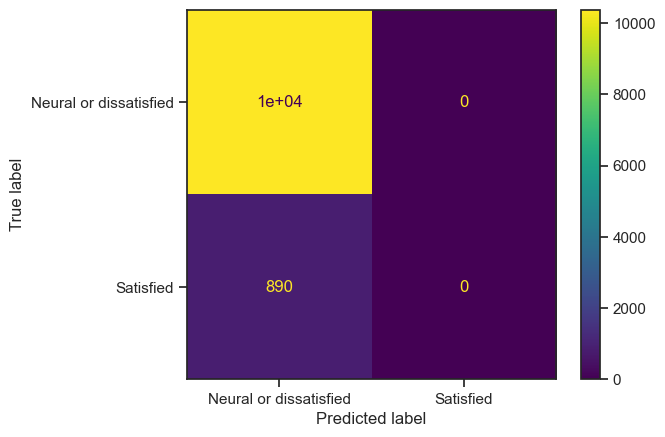

In [16]:
cm1 = confusion_matrix(y_test, target1_1, labels = cl1_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Neural or dissatisfied', 'Satisfied'])
disp.plot()

In [17]:
# 4.Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(5,30,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25])}]

In [18]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=100, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

{'n_neighbors': 20}

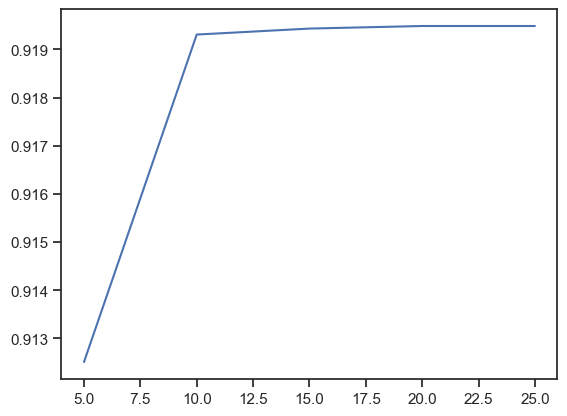

In [19]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [20]:
# Повторный подбор
n_range = np.array(range(5,25,1))
tuned_parameters = [{'n_neighbors': n_range}]
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=100, scoring='accuracy')
clf_gs.fit(X, y)
clf_gs.best_params_

{'n_neighbors': 12}

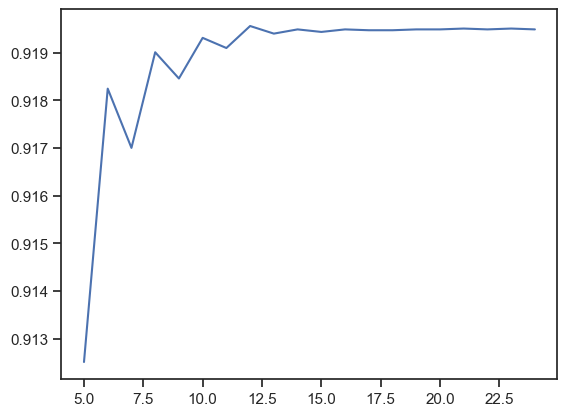

In [21]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [22]:
# 5.Обучение модели и оценка качества с учетом подобранных гиперпараметров (k=12)
clf_gs.best_estimator_.fit(X_train, y_train)
target2_0 = clf_gs.best_estimator_.predict(X_train)
target2_1 = clf_gs.best_estimator_.predict(X_test)
# Новое качество модели
accuracy_score(y_train, target2_0), accuracy_score(y_test, target2_1)

(0.9192768411712511, 0.9210292812777284)

In [23]:
# Качество модели до подбора гиперпараметров
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.9190993788819876, 0.9210292812777284)

In [24]:
cm2 = confusion_matrix(y_test, target2_1, labels = clf_gs.classes_)

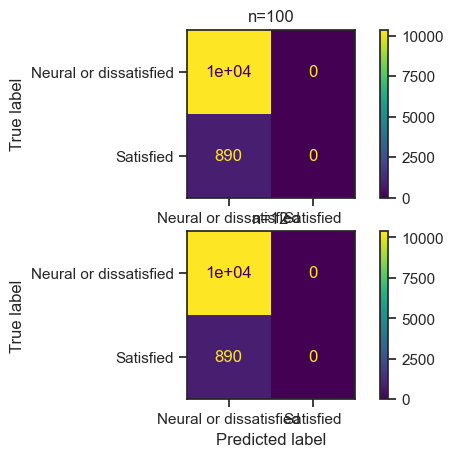

In [25]:
fig, ax = plt.subplots(2,1)
ax[0].set_title("n=100")
ax[1].set_title("n=12")

ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[1]);

In [26]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [27]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\nagor\\Desktop\\семестр\\ТМО\\ML-6sem\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

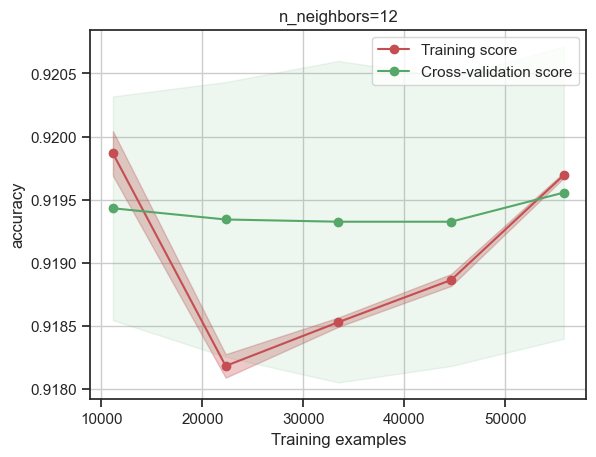

In [366]:
# 6.Построение кривых обучения и валидации
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=12', X, y, cv=100, train_sizes=np.linspace(.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'c:\\Users\\nagor\\Desktop\\семестр\\ТМО\\ML-6sem\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

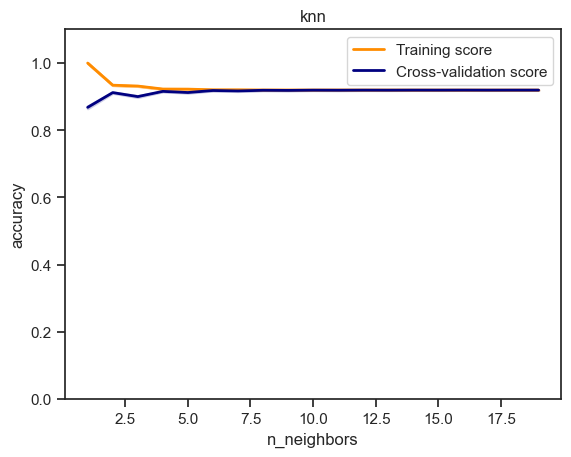

In [29]:
n_range2 = np.array(range(1,20,1))
plot_validation_curve(clf_gs.best_estimator_, 'knn', X, y, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=10, scoring="accuracy")